<a href="https://colab.research.google.com/github/Vixuz144/Admin-Prod/blob/main/Preparaci%C3%B3n_segundo_ex%C3%A1men_Admin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd

#Pronósticos

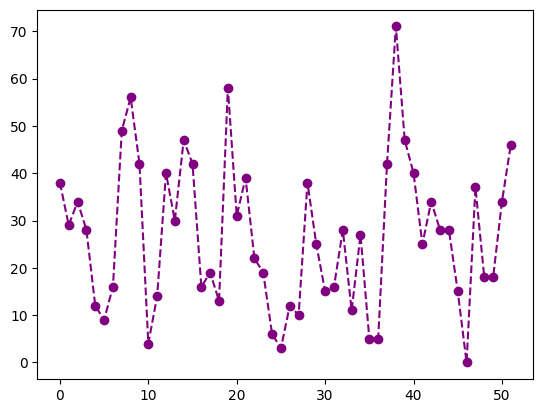

In [ ]:
#base = pd.read_excel("JATO NUEVO 2.xlsx", 1).to_numpy()

#date = base[0 ,26:78]
#y0 = base[43 ,26:78]
date = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
y0 = np.array([38, 29, 34, 28, 12, 9, 16, 49, 56, 42, 4, 14, 40, 30, 47, 42, 16, 19, 13, 58, 31, 39, 22, 19, 6, 3, 12, 10, 38, 25, 15, 16, 28, 11, 27, 5, 5, 42, 71, 47, 40, 25, 34, 28, 28, 15, 0, 37, 18, 18, 34, 46])
x0 = np.arange(len(y0))

plt.plot(x0,y0, 'o--', color = 'purple')
plt.show()

##Regresión lineal

Coeficiente R^2 = 0.008221278269867294
Suma del absoluto de los residuales = 634.6072385012508


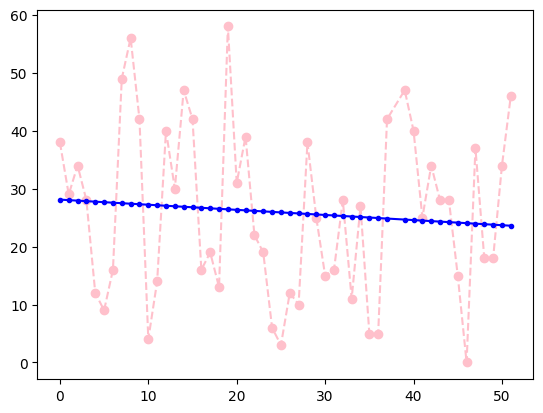

In [ ]:
x, y = x0, y0

med = np.mean(y)
desv = np.std(y, ddof = 1)


c = 2.5
a = y <= med - c*desv
b = y >= med + c*desv

x = x.tolist()
y = y.tolist()

n = list(a | b).count(True)
for i in range(n):
  k = list(a | b).index(True)
  y.pop(k)
  x.pop(k)
  a = np.array(y) <= med - c*desv
  b = np.array(y) >= med + c*desv

reg = ss.linregress(x,y)
a = reg.slope
b = reg.intercept
y_rl = a*np.array(x) + b

print(f'Coeficiente R^2 = {reg.rvalue**2}')
# print(f'Residuales: {np.array(y) - y_rl}')
# print(f'Valor absoluto de los residuales: {abs(np.array(y) - y_rl)}')
print(f'Suma del absoluto de los residuales = {sum(abs(np.array(y) - y_rl))}')
coef_rl = sum(abs(np.array(y) - y_rl)) / len(y_rl)

plt.plot(x,y, 'o--', color = 'pink')
plt.plot(x,y_rl, '.-', color = 'blue')
plt.show()

##Medias móviles

Suma del absoluto de los residuales = 719.0


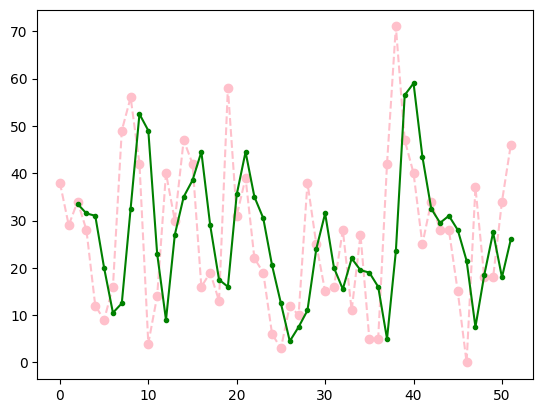

In [ ]:
x,y = x0, y0

lag = 2

x_mm = x[lag:]
y_ob = y[lag:]
y_mm = []

n = len(y)
for i in range(n - lag):
  y_mm.append(y[i:i+lag].mean())

print(f'Suma del absoluto de los residuales = {sum(abs(y_ob - y_mm))}')
coef_mm = sum(abs(y_ob - y_mm)) / len(y_mm)

plt.plot(x,y, 'o--', color = 'pink')
plt.plot(x_mm,y_mm, '.-', color = 'g')
plt.show()

##Medias ponderadas

Suma del absoluto de los residuales = 650.75


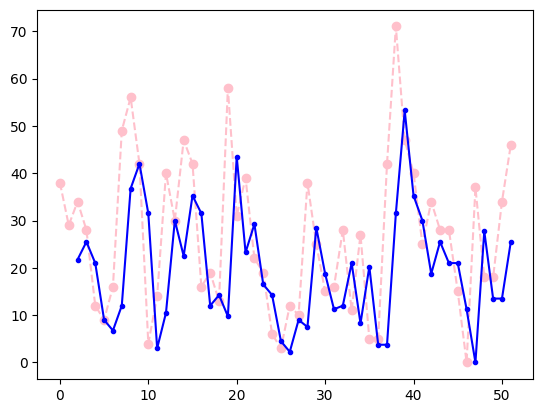

In [ ]:
x,y = x0, y0
p = [0.25, 0.75]
lag = len(p)

x_mv = x[lag:]
y_ob = y[lag:]
y_mv = []

n = len(y)
for i in range(n - lag):
  s = 0
  for j in range(lag):
    s = y[i + j] * p[j]
  y_mv.append(s)

print(f'Suma del absoluto de los residuales = {sum(abs(y_ob - y_mv))}')
coef_mv = sum(abs(y_ob - y_mv)) / len(y_mv)

plt.plot(x,y, 'o--', color = 'pink')
plt.plot(x_mv,y_mv, '.-', color = 'b')
plt.show()

##Suavizaciòn exponencial simple

Suma del absoluto de los residuales = 698.1552611552938


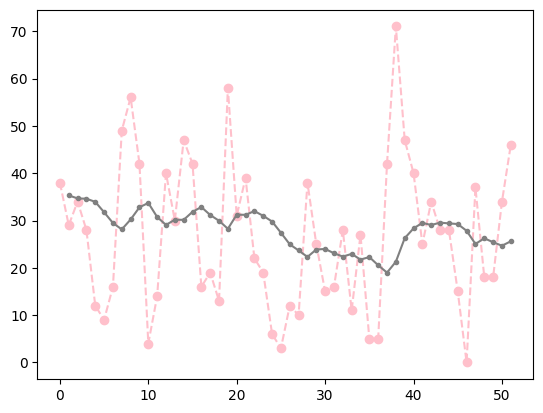

In [ ]:
x,y = x0, y0
se = [35]
a = 0.1
n = len(y)
for i in range(n):
  se.append(se[i] + a * (y[i] - se[i]))

x_se = x[1:]
y_ob = y[1:]

y_se = se[1:-1]

print(f'Suma del absoluto de los residuales = {sum(abs(y_ob - y_se))}')
coef_se = sum(abs(y_ob - y_se)) / len(y_se)

plt.plot(x,y, 'o--', color = 'pink')
plt.plot(x_se,y_se, '.-', color = 'gray')
plt.show()

##Estacionalidad

###Abril

['Apr', 'Apr', 'Apr', 'Apr']
0.8847244094488188


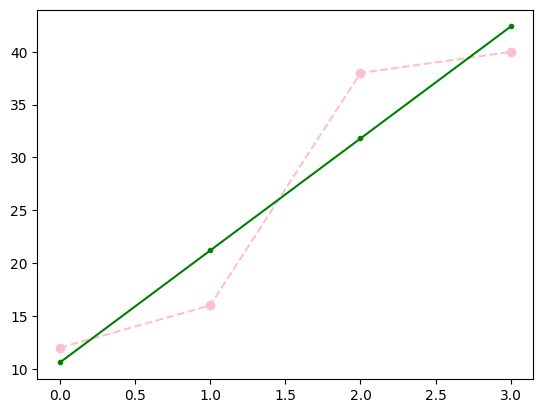

In [ ]:
print(date[4::12])
y = y0[4::12]
x = np.arange(len(y))
reg_abril = ss.linregress(x.tolist(),y.tolist())
a = reg_abril.slope
b = reg_abril.intercept
r = reg_abril.rvalue

print(r**2)

y_aj = a*x + b

coef_la = sum(abs(y - y_aj)) / len(y_aj)

plt.plot(x,y, 'o--', color = 'pink')
plt.plot(x,y_aj, '.-', color = 'g')
plt.show()

###Mayo

['May', 'May', 'May', 'May']
0.8526315789473684


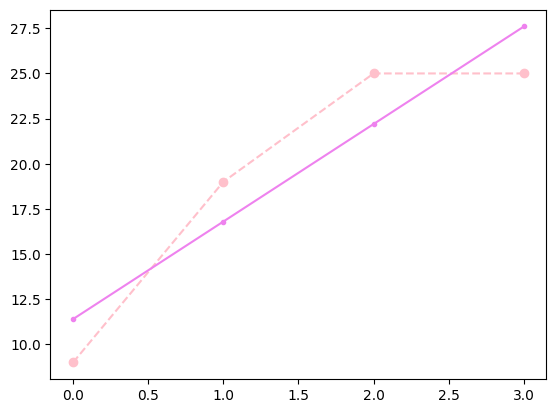

In [ ]:
print(date[5::12])
y = y0[5::12]
x = np.arange(len(y))
reg_mayo = ss.linregress(x.tolist(),y.tolist())
a = reg_mayo.slope
b = reg_mayo.intercept
r = reg_mayo.rvalue

print(r**2)

y_aj = a*x + b

coef_lm = sum(abs(y - y_aj)) / len(y_aj)

plt.plot(x,y, 'o--', color = 'pink')
plt.plot(x,y_aj, '.-', color = 'violet')
plt.show()

###Junio

['Jun', 'Jun', 'Jun', 'Jun']
0.5501754385964913


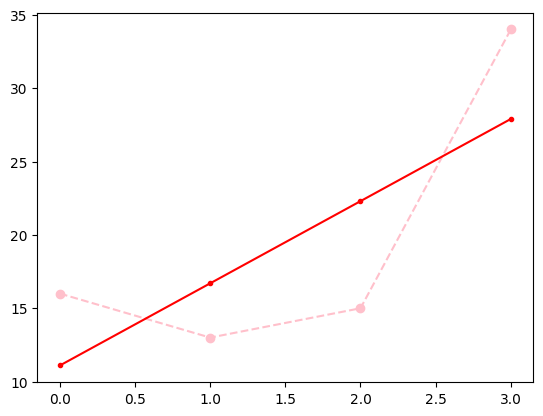

In [ ]:
print(date[6::12])
y = y0[6::12]
x = np.arange(len(y))
reg_junio = ss.linregress(x.tolist(),y.tolist())
a = reg_junio.slope
b = reg_junio.intercept
r = reg_junio.rvalue

print(r**2)

y_aj = a*x + b

coef_lj = sum(abs(y - y_aj)) / len(y_aj)

plt.plot(x,y, 'o--', color = 'pink')
plt.plot(x,y_aj, '.-', color = 'r')
plt.show()

16.6
11.200000000000019
16.800000000000015
33.399999999999984
60.99999999999994


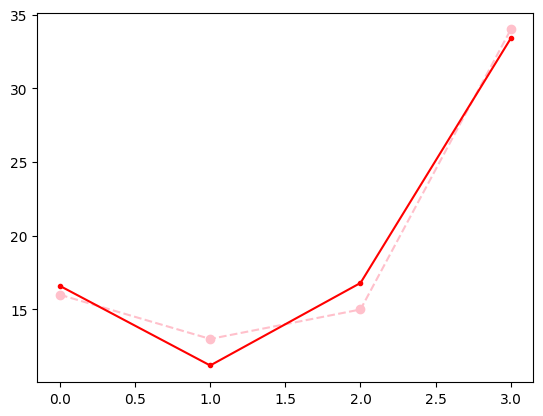

In [ ]:
x_obs = np.transpose([np.ones(len(x)), x, x**2])
y_obs = np.transpose([y])


xx = np.transpose(x_obs).dot(x_obs).astype(float)
yy = np.transpose(x_obs).dot(y_obs).astype(float)

beta = np.linalg.solve(xx,yy.T[0])

# print(beta)
for i in range(5):
  print(sum(beta*[1, i, i**2]))

y_est = np.dot(x_obs,beta)

coef_pj = sum(abs(y - y_est)) / len(y_est)

plt.plot(x,y_obs, 'o--', color = 'pink')
plt.plot(x,y_est, '.-', color = 'r')
plt.show()

##Comparación

In [ ]:
print(coef_rl)
print(coef_mm)
print(coef_mv)
print(coef_se)
print(coef_la)
print(coef_lm)
print(coef_lj)
print(coef_pj)

12.443279186299035
14.38
13.015
13.689318846182232
3.8
2.500000000000001
5.500000000000001
1.2000000000000033


#Inventarios